In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Set visualization style
sns.set(style='whitegrid', palette='muted')

df = pd.read_csv("titanic2.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",Female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe(include='all'))

Dataset Shape: (909, 12)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909 entries, 0 to 908
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  909 non-null    int64  
 1   Survived     909 non-null    int64  
 2   Pclass       909 non-null    object 
 3   Name         909 non-null    object 
 4   Sex          909 non-null    object 
 5   Age          710 non-null    float64
 6   SibSp        909 non-null    int64  
 7   Parch        909 non-null    int64  
 8   Ticket       909 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        208 non-null    object 
 11  Embarked     907 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 85.3+ KB
None

Summary Statistics:
        PassengerId    Survived Pclass                               Name  \
count    909.000000  909.000000    909                                909   
unique          NaN     

In [5]:
print("\nMissing Values per Column:")
print(df.isnull().sum())


Missing Values per Column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            199
SibSp            0
Parch            0
Ticket           0
Fare            18
Cabin          701
Embarked         2
dtype: int64


In [6]:
print("\nNumber of Duplicate Rows:", df.duplicated().sum())


Number of Duplicate Rows: 10


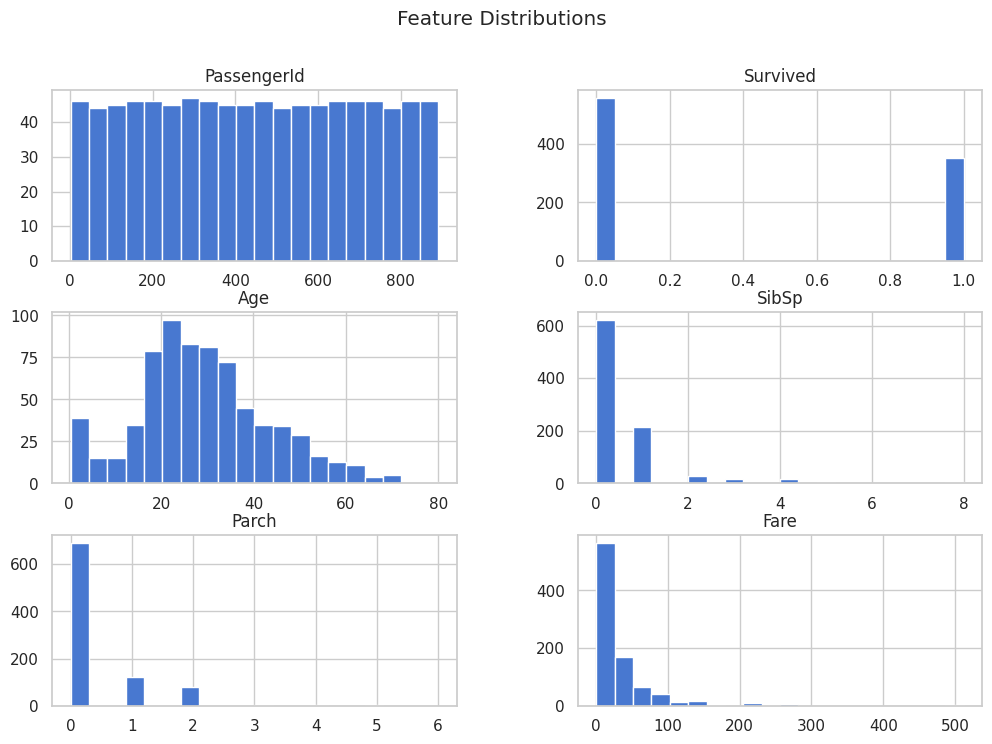

In [7]:
# Distribution of numerical columns
df.hist(figsize=(12,8), bins=20)
plt.suptitle("Feature Distributions")
plt.show()


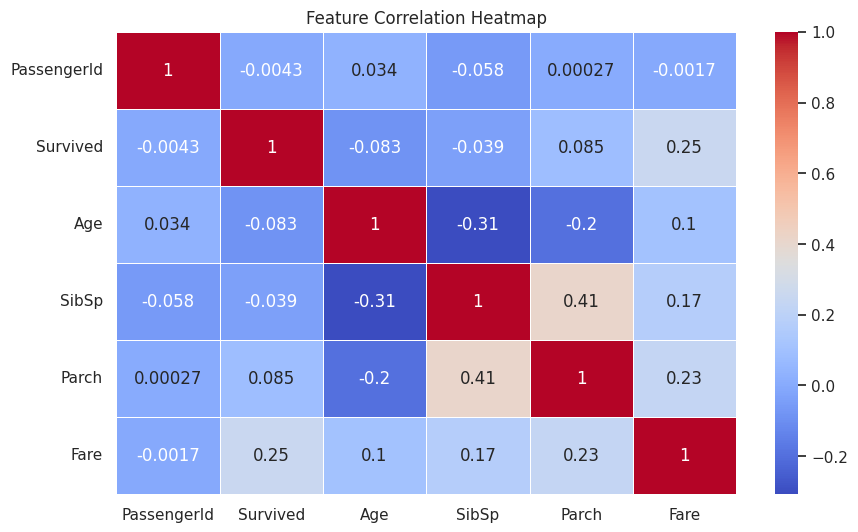

In [8]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


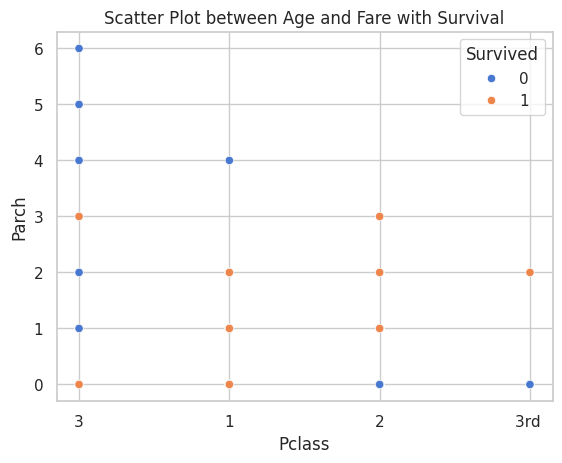

In [9]:
# Scatter between features (Age vs Fare)
sns.scatterplot(x='Pclass', y='Parch', hue='Survived', data=df)
plt.title("Scatter Plot between Age and Fare with Survival")
plt.show()


In [10]:
# Handling Missing Values
print("Before Imputation:", df.isnull().sum())

Before Imputation: PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            199
SibSp            0
Parch            0
Ticket           0
Fare            18
Cabin          701
Embarked         2
dtype: int64


In [11]:

# Fill 'Embarked' with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [12]:
# KNN

from sklearn.impute import KNNImputer


In [13]:
# Use KNN Imputer for Age and Fare
imputer = KNNImputer(n_neighbors=5)
df[['Age','Fare']] = imputer.fit_transform(df[['Age','Fare']])

In [14]:
print("After Imputation:", df.isnull().sum())

After Imputation: PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          701
Embarked         0
dtype: int64


In [15]:
df.drop(columns=['Cabin'],inplace=True,errors='ignore')
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [16]:
# 6.2 Handling Duplicates
df.drop_duplicates(inplace=True)
print("After Removing Duplicates:", df.shape)

After Removing Duplicates: (899, 11)


In [17]:
# 6.3 Handling Inconsistencies in categorical columns
df['Sex'] = df['Sex'].str.lower().replace({'femalee':'female','mal':'male','Male':'male','Female':'female'})
df['Embarked']=df['Embarked'].replace({'Southmpton':'S','Queenstown':'Q','Cherbourg':'C','cherbourg':'C'})
df['Embarked'] = df['Embarked'].str.lower()


In [18]:
# Extracting Title from Name as new feature
df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
title_map = {'Mr':1, 'Miss':2, 'Mrs':3, 'Master':4, 'Dr':5, 'Rev':6, 'Col':7, 'Major':8, 'Mlle':2, 'Countess':3, 'Mme':3, 'Don':1, 'Lady':3, 'Sir':1, 'Jonkheer':1, 'Capt':7}
df['Title'] = df['Title'].map(title_map).fillna(0)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,s,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,c,3.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,s,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,s,3.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,s,1.0


In [ ]:
# --- Fix Pclass column if it contains strings like '1st', '2nd', '3rd ' ---
df['Pclass'] = df['Pclass'].astype(str)              # ensure string type
df['Pclass'] = df['Pclass'].str.replace('st', '', regex=False)
df['Pclass'] = df['Pclass'].str.replace('nd', '', regex=False)
df['Pclass'] = df['Pclass'].str.replace('rd', '', regex=False)
df['Pclass'] = df['Pclass'].str.strip()              # remove any spaces
df['Pclass'] = df['Pclass'].astype(int)              # convert to numeric

In [19]:
from sklearn.preprocessing import LabelEncoder
# Encode categorical features
label = LabelEncoder()
df['Sex'] = label.fit_transform(df['Sex'])
df['Embarked'] = label.fit_transform(df['Embarked'])
# Select important features
features = ['Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch', 'Title']
target = 'Survived'

X = df[features]
y = df[target]
for col in ['Age', 'Fare']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] > upper, upper, np.where(df[col] < lower, lower, df[col]))

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Train: {X_train.shape}, Validation: {X_valid.shape}, Test: {X_test.shape}")

Train: (629, 7), Validation: (135, 7), Test: (135, 7)


In [22]:
from sklearn.preprocessing import StandardScaler


In [25]:

categorical_cols = ['Pclass', 'Sex']

X_train_encoded = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_valid_encoded = pd.get_dummies(X_valid, columns=categorical_cols, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

train_cols = X_train_encoded.columns
X_valid_aligned = X_valid_encoded.reindex(columns=train_cols, fill_value=0)
X_test_aligned = X_test_encoded.reindex(columns=train_cols, fill_value=0)

print("Encoding completed successfully with updated column list!")

Encoding completed successfully with updated column list!


In [26]:

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_encoded)
X_valid_scaled = scaler.transform(X_valid_aligned)
X_test_scaled = scaler.transform(X_test_aligned)

print("Standardization completed successfully!")

Standardization completed successfully!


In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
# model training
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [32]:
y_pred = knn.predict(X_train_scaled)

In [33]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,precision_score,recall_score,f1_score,roc_auc_score

In [34]:
print("KNN Model Evaluation Metrics:")

KNN Model Evaluation Metrics:


In [36]:

X_features_for_prediction = X_test_scaled

y_pred = knn.predict(X_features_for_prediction)

print(f"y_test length: {len(y_test)}")
print(f"y_pred length: {len(y_pred)}")

y_test length: 135
y_pred length: 135



Confusion Matrix:


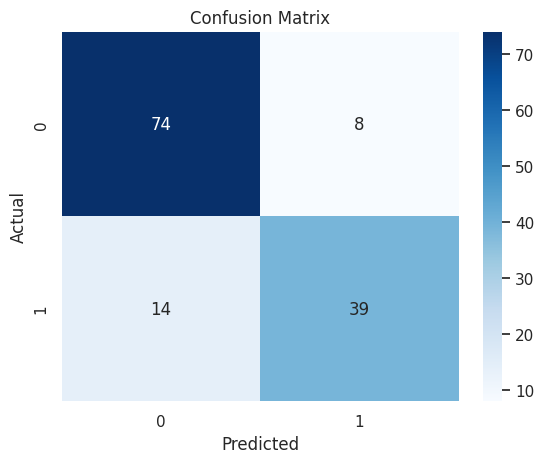

In [37]:


print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [38]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy:",acc)

Accuracy: 0.837037037037037


In [39]:
prec = precision_score(y_test, y_pred)
print("Precision:",prec)

Precision: 0.8297872340425532


In [40]:
rec = recall_score(y_test, y_pred)
print("Recall (Sensitivity):",rec)

Recall (Sensitivity): 0.7358490566037735


In [41]:
f1 = f1_score(y_test, y_pred)
print("F1 Score:",f1)

F1 Score: 0.78


In [42]:
roc = roc_auc_score(y_test, y_pred)
print("ROC-AUC:",roc)

ROC-AUC: 0.8191440404970087


In [43]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        82
           1       0.83      0.74      0.78        53

    accuracy                           0.84       135
   macro avg       0.84      0.82      0.83       135
weighted avg       0.84      0.84      0.84       135



In [44]:
%cd /content/Data-Preprocessing-for-ML-using-Titanic-Dataset

/content/Data-Preprocessing-for-ML-using-Titanic-Dataset
